# Анализ датасет c Kaggle.com

Прочитайте csv файл (используйте функцию read_csv)

In [1]:
import pandas as pd

df = pd.read_csv("bestsellers with categories.csv")

Выведите первый пять строчек (используется функцию head)

In [3]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Выведите размеры датасета (используйте атрибут shape)

In [4]:
print(df.shape)

(550, 7)


О скольки книгах хранит данные датасет?

In [7]:
print(f"Ответ: {df.nunique()['Name']}")

Ответ: 351


In [8]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# Первичное исследование данных

Проверьте у всех ли строк хватает данных: выведите количество пропусков (na) в каждом из столбцов (используйте функции isna и sum)

In [11]:
null_counts = df.isnull().sum()
print(null_counts)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


Есть ли в каких либо переменных пропуски? 
Ответ: Нет

Проверьте, какие есть уникальные значения в колонке genre (используйте функцию unique)

In [12]:
print(df['genre'].unique())

['Non Fiction' 'Fiction']


Какие есть уникальные жанры?
Ответ: Non Fiction, Fiction

Теперь посмотрите на распределение цен: постройте диаграмму (используйте kind='hist')

<AxesSubplot:ylabel='Frequency'>

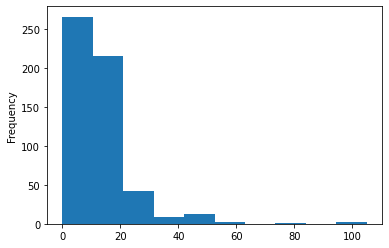

In [14]:
import matplotlib.pyplot as plt
plt.figure();
df["price"].plot(kind="hist")

Определите, какая цена у нас максимальная, минимальная, средняя, медианная (используйте функции max, min, mean, median)

In [16]:
print(df["price"].max())
print(df["price"].min())
print(df["price"].mean())
print(df["price"].median())

105
0
13.1
11.0


Mаксимальная цена?
Ответ: 105

Минимальная цена? Ответ: 0

Средняя цена? Ответ: 13.1

Медианная цена? Ответ: 11.0

# Поиск и сортировка данных

In [20]:
print(df["user_rating"].max())

4.9


Какой рейтинг в датасете наивысший? Ответ: 4.9

In [24]:
print(df.query("user_rating == 4.9")['name'].count())

52


Сколько книг имеют такой рейтинг? Ответ: 52

In [26]:
print(df.loc[df['reviews'].idxmax(), 'name'])

Where the Crawdads Sing


У какой книги больше всего отзывов? Ответ: Where the Crawdads Sing

In [27]:
top_50_2015 = df[(df['year'] == 2015)]

most_expensive = top_50_2015.sort_values(by='price', ascending=False).iloc[0]

print(most_expensive['name'])

Publication Manual of the American Psychological Association, 6th Edition


Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая? Ответ: Publication Manual of the American Psychological Association, 6th Edition

In [28]:
fiction_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]

count = fiction_2010.shape[0]

print(count)

20


Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? Ответ: 20

In [30]:
books_4_9 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]

count = books_4_9.shape[0]

print(count)

1


Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? Ответ: 1

In [33]:
books_2015 = df[(df['year'] == 2015) & (df['price'] < 8)]

books_sorted = books_2015.sort_values(by='price')

books_sorted.head(5)

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction


In [37]:
books_sorted.tail(1)

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


Какая книга последняя в отсортированном списке? Ответ: Old School (Diary of a Wimpy Kid #10)

# Агрегирование данных и соединения таблиц

Для начала давайте посмотрим на максимальную и минимальную цены для каждого из жанров (используйте функции groupby и agg, для подсчета минимальных и максимальных значений используйте max и min). Не берите все столбцы, виберете только нужные вам

In [38]:
print(df.groupby('genre')['price'].agg(['min', 'max']))

             min  max
genre                
Fiction        0   82
Non Fiction    0  105


Максимальная цена для жанра Fiction: Ответ 82
Минимальная цена для жанра Fiction: Ответ 0
Максимальная цена для жанра Non Fiction: Ответ 105
Минимальная цена для жанра Non Fiction: Ответ 0

Теперь создайте новый датафрейм, который будет вмещать в себя количество книг для каждого из авторов (используйте функции groupby и agg, для подсчета количества используйте count). Не берите все столбцы, виберете только нужные

In [75]:
books_by_author = df.groupby('author').agg({'name': 'count'})

books_by_author = books_by_author.rename(columns={'name': 'number_of_books'})

print(books_by_author.shape)
books_by_author = books_by_author.sort_values(by='number_of_books')
books_by_author.tail()

(248, 1)


,number_of_books
author,
American Psychological Association,10
Suzanne Collins,11
Gary Chapman,11
Rick Riordan,11
Jeff Kinney,12


Какой размерности вышла таблица? Ответ: (248, 1)

У какого автора больше всего книг? Ответ: Jeff Kinney

Сколько книг у этого автора? Ответ: 12

In [73]:
ratings_by_author = df.groupby('author').agg({'user_rating': 'mean'})

ratings_by_author = ratings_by_author.rename(columns={'user_rating': 'average_rating'})

print(ratings_by_author.shape)

ratings_by_author = ratings_by_author.sort_values(by='average_rating', ascending = False)
ratings_by_author.tail()


(248, 1)


,average_rating
author,
Paula Hawkins,4.1
Muriel Barbery,4.0
Gillian Flynn,4.0
Gallup,4.0
Donna Tartt,3.9


У какого автора средний рейтинг минимальный? Ответ: Donna Tartt
Какой у этого автора средний рейтинг? Ответ: 3.9

Соедините последние два датафрейма так, чтобы для каждого автора было видно количество книг и средний рейтинг (Используйте функцию concat с параметром axis=1). Сохраните результат в переменную

In [53]:
result = pd.concat([books_by_author, ratings_by_author], axis=1).reset_index()

result.head()

,author,number_of_books,average_rating
0,Abraham Verghese,2,4.6
1,Adam Gasiewski,1,4.4
2,Adam Mansbach,1,4.8
3,Adir Levy,1,4.8
4,Admiral William H. McRaven,1,4.7


Отсортируйте датафрейм по возрастающему количеству книг и возрастающему рейтингу (используйте функцию sort_values)

In [76]:
result = result.sort_values(by=['number_of_books', 'average_rating'])
result.head()

,author,number_of_books,average_rating
171,Muriel Barbery,1,4.0
43,Chris Cleave,1,4.1
109,Ian K. Smith M.D.,1,4.1
186,Pierre Dukan,1,4.1
81,Elizabeth Strout,1,4.2


Какой автор первый в списке?: Ответ Muriel Barbery	